importing fast.ai modules.

givess access permission of google drive for accessing dataset 

In [ ]:

from google.colab import drive
!curl -s https://course.fast.ai/setup/colab | bash
from fastai import *
from fastai.vision import *
import numpy as np
import pandas as pd
import os
import shutil


import cv2
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
from skimage.util import random_noise


drive.mount('/content/drive/')
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + '/Aut_research/mel_test1/'
path = Path(base_dir + 'data/bears')
#dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)
titanic = pd.read_csv("/content/drive/My Drive/Aut_research/mel_test1/HAM10000_refined.csv")
titanic.head(5)

Updating fastai...
Done.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


,lesion_id,image_id,dx,dx_type
0,HAM_0000118,ISIC_0027419,bkl,histo
1,HAM_0000118,ISIC_0025030,bkl,histo
2,HAM_0002730,ISIC_0026769,bkl,histo
3,HAM_0002730,ISIC_0025661,bkl,histo
4,HAM_0001466,ISIC_0031633,bkl,histo


/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.361613,0.927431,0.689097,03:38
1,0.990915,0.703101,0.741274,03:34
2,0.830276,0.628051,0.763584,03:34
3,0.701338,0.549877,0.792731,03:34
4,0.631942,0.459431,0.824757,03:34
5,0.570067,0.420317,0.841670,03:36
6,0.495738,0.351507,0.871896,03:34
7,0.480954,0.332135,0.880533,03:42
8,0.421694,0.312413,0.888089,03:48
9,0.417534,0.309165,0.887729,03:40


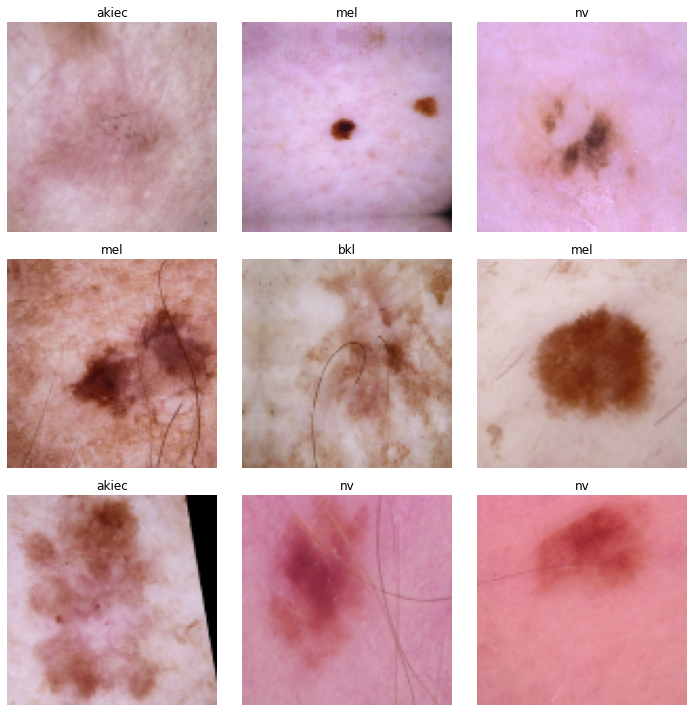

In [ ]:
tfms = get_transforms(do_flip=False)
path_ic = '/content/drive/My Drive/Aut_research/mel_test1'
data = ImageDataBunch.from_folder(path_ic,ds_tfms=tfms, size=100)
data.show_batch(rows=3, figsize=(10,10))
my_trained_mod = create_cnn(data, models.resnet50, metrics=accuracy)
my_trained_mod.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


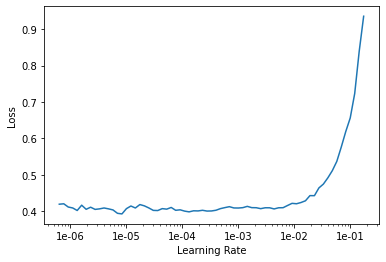

In [ ]:
my_trained_mod.lr_find()
my_trained_mod.recorder.plot()


In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 23kB/s 
     |████████████████████████████████| 4.0MB 31.2MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


preproceesing and moving images in to each folder as per their lesion type from the whole dataset

Repeat the process for each lesion types to move to each individual folders



In [ ]:
df=pd.read_csv("/content/drive/My Drive/Aut_research/mel_test1/HAM10000_refined.csv")
import os.path



titanic = pd.read_csv("/content/drive/My Drive/Aut_research/mel_test1/HAM10000_refined.csv", usecols=['image_id','dx'])
#print(titanic['image_id'])
#for x in range(8):
#print(titanic['10'])
print(len(df.index))
le=len(df.index);
#for x in range(le):
 #print(titanic[x])

for index,produto in titanic.iterrows():
   if produto['dx'] == 'akiec': 
    source='/content/drive/My Drive/Aut_research/mel_test1/all_photos/'+produto['image_id']+'.jpg'
    #destination='/content/drive/My Drive/Aut_research/mel_test1/train/'+produto['dx']+'/'+produto['image_id']+'.jpg'
    destination='/content/drive/My Drive/Aut_research/mel_test1/train/'+'akiec'+'/'+produto['image_id']+'.jpg'
    if os.path.isfile(source):
      print ("File exist")
      shutil.copy(source, destination)
    else:
      print ("File not exist")
    
#print(destination)
    

   
    
    #os.rename("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
    #shutil.copy("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
    #os.replace("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
#os.rename("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
#shutil.move("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
#os.replace("path/to/current/file.foo", "path/to/new/destination/for/file.foo")

Data balancing using image augmentation methods

In [ ]:
# image aug test

images_path="/content/drive/My Drive/Aut_research/mel_test1/aug_test" #path to original images
augmented_path="/content/drive/My Drive/Aut_research/mel_test1/aug_out" # path to store aumented images
images=[] # to store paths of images from folder
def anticlockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, angle)

def clockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, -angle)

def h_flip(image):
    return  np.fliplr(image)

def v_flip(image):
    return np.flipud(image)

transformations = {'rotate anticlockwise': anticlockwise_rotation,
                      'rotate clockwise': clockwise_rotation,
                      'horizontal flip': h_flip, 
                      'vertical flip': v_flip
                 }                #use dictionary to store names of functions 


for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

images_to_generate=20  #you can change this value according to your requirement
i=1                        # variable to iterate till images_to_generate

while i<=images_to_generate:    
    image=random.choice(images)
    original_image = io.imread(image)
    transformed_image=None
#     print(i)
    n = 0       #variable to iterate till number of transformation to apply
    transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
    
    while n <= transformation_count:
        key = random.choice(list(transformations)) #randomly choosing method to call
        transformed_image = transformations[key](original_image)
        n = n + 1
        
    new_image_path= "%s/augmented_image_%s.jpg" %(augmented_path, i)
    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
    cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
    i =i+1
#to generate more images, put above 3 statement inside while n<... loop